Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.

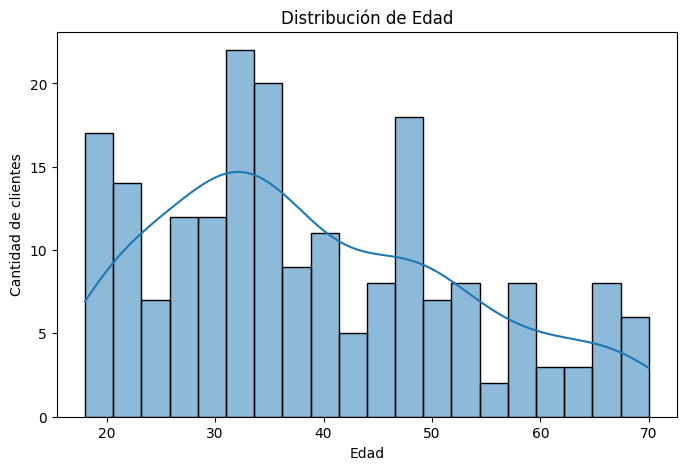

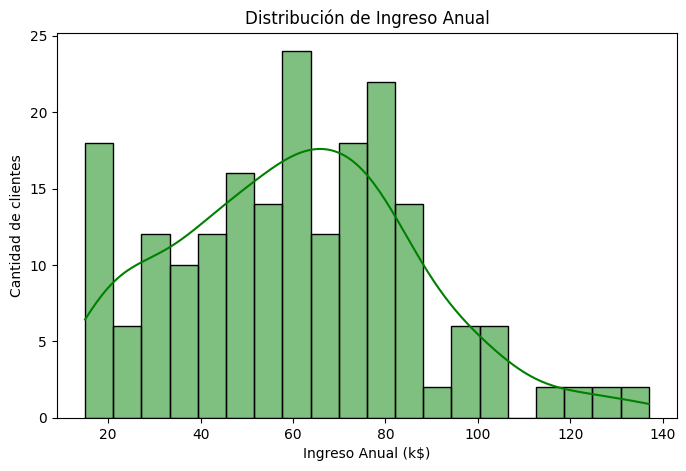

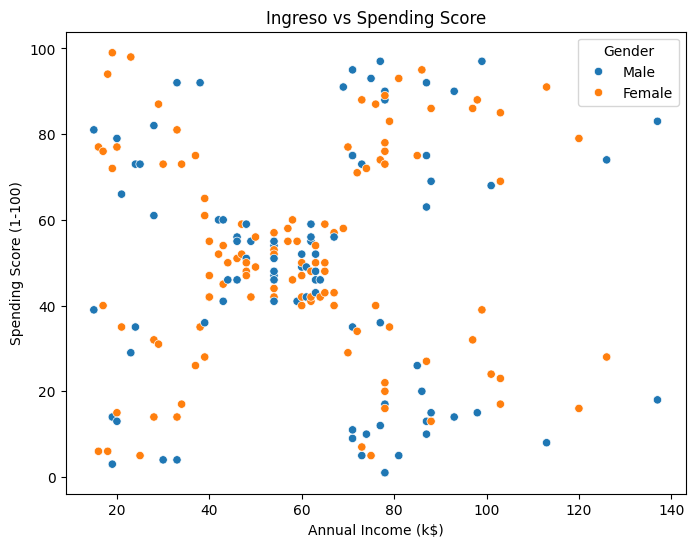

In [2]:
# Paso.1 Análisis Exploratorio de los Datos (EDA)
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset
df = pd.read_csv('Mall_Customers.csv')

# Mostramos las primeras filas para tener una idea general
print("Primeras filas del dataset:")
print(df.head())

# Mostramos la estructura del dataset: columnas, tipos de datos y valores nulos
print("\nInformación general del dataset:")
print(df.info())

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Revisamos si hay valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Visualizamos la distribución de las edades
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes')
plt.show()

# Visualizamos la distribución de ingresos anuales
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='green')
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Visualizamos la relación entre Ingreso Anual y Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Ingreso vs Spending Score')
plt.show()

In [3]:
# Paso 2. Preprocesamiento de los datos

# Revisamos si hay valores nulos en el dataset
print("Valores nulos por columna:")
print(df.isnull().sum())

# Revisamos los tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Mostramos los valores únicos en la columna 'Gender'
print("\nValores únicos en la columna 'Gender':")
print(df['Gender'].unique())

# Convertimos la columna 'Gender' a variables numéricas (One-Hot Encoding)
# Esto creará una columna 'Gender_Male' (si es 1, es hombre; si es 0, es mujer)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Mostramos las primeras filas del dataset ya procesado
print("\nDataset después de codificar 'Gender':")
print(df.head())

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Tipos de datos:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Valores únicos en la columna 'Gender':
['Male' 'Female']

Dataset después de codificar 'Gender':
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


In [4]:
# Paso 3. Selección de características
# Seleccionamos tres columnas para clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Mostramos las primeras filas
print(X.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [5]:
# Paso 4 entrenamiento del modelo con diferentes combinaciones
from sklearn.cluster import KMeans

# Definimos diferentes combinaciones de hiperparámetros
modelos = [
    {"n_clusters": 3, "init": "k-means++", "n_init": 10, "max_iter": 300},
    {"n_clusters": 5, "init": "random",    "n_init": 10, "max_iter": 300},
    {"n_clusters": 6, "init": "k-means++", "n_init": 20, "max_iter": 500},
]

# Entrenamos cada modelo y mostramos el valor de inercia (qué tan compactos son los clústeres)
for i, params in enumerate(modelos):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        random_state=0
    )
    kmeans.fit(X)
    print(f"Modelo {i+1}: clusters={params['n_clusters']}, init={params['init']}, "
          f"n_init={params['n_init']}, max_iter={params['max_iter']}, "
          f"inercia={kmeans.inertia_:.2f}")

Modelo 1: clusters=3, init=k-means++, n_init=10, max_iter=300, inercia=143342.75
Modelo 2: clusters=5, init=random, n_init=10, max_iter=300, inercia=75350.78
Modelo 3: clusters=6, init=k-means++, n_init=20, max_iter=500, inercia=58300.44


In [7]:
# Paso 5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluamos cada modelo con distintas métricas
for i, params in enumerate(modelos):
    kmeans = KMeans(
        n_clusters=params["n_clusters"],
        init=params["init"],
        n_init=params["n_init"],
        max_iter=params["max_iter"],
        random_state=0
    )
    labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    print(f"Modelo {i+1}: clusters={params['n_clusters']}, init={params['init']}")
    print(f"  - Silhouette: {silhouette:.4f}")
    print(f"  - Calinski-Harabasz: {calinski:.2f}")
    print(f"  - Davies-Bouldin: {davies:.4f}\n")

Modelo 1: clusters=3, init=k-means++
  - Silhouette: 0.3839
  - Calinski-Harabasz: 113.71
  - Davies-Bouldin: 0.8748

Modelo 2: clusters=5, init=random
  - Silhouette: 0.4443
  - Calinski-Harabasz: 151.04
  - Davies-Bouldin: 0.8219

Modelo 3: clusters=6, init=k-means++
  - Silhouette: 0.4523
  - Calinski-Harabasz: 166.72
  - Davies-Bouldin: 0.7470



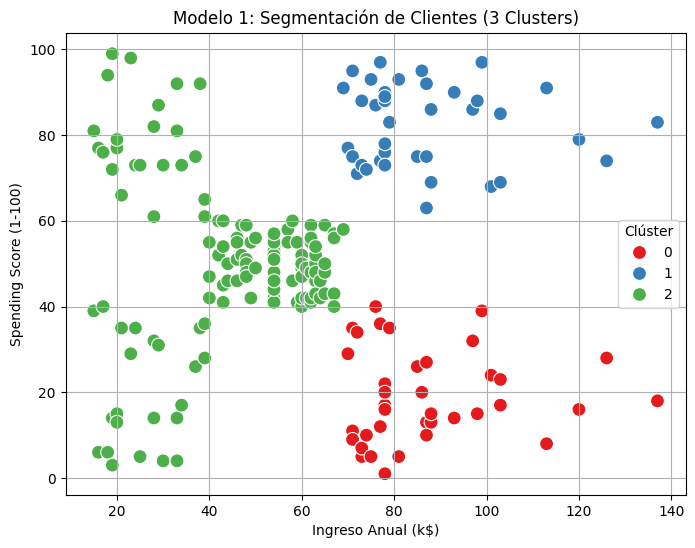

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\1381174830.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set2')


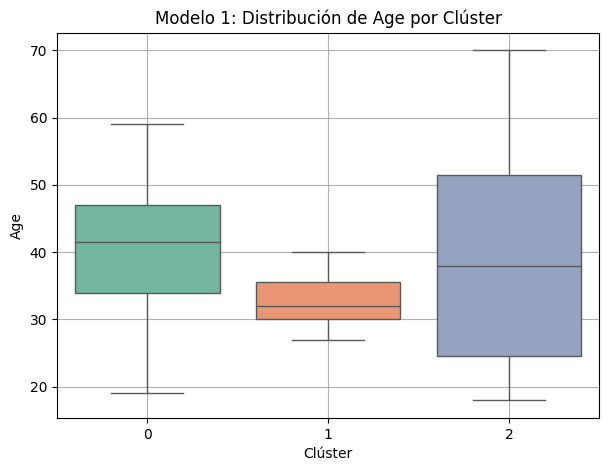

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\1381174830.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set2')


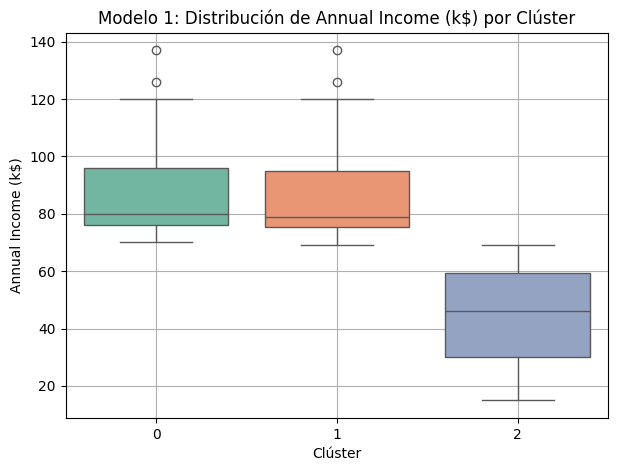

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\1381174830.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set2')


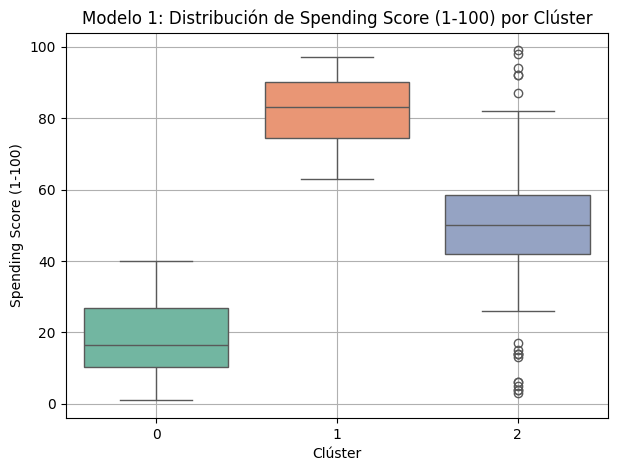

Métricas del Modelo 1:
  - Silhouette: 0.3839
  - Calinski-Harabasz: 113.71
  - Davies-Bouldin: 0.8748


In [9]:
# Paso 6: Entrenar el Modelo 1
from sklearn.cluster import KMeans

# Definimos el modelo con los parámetros del Modelo 1
modelo1 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)

# Entrenamos el modelo con los datos seleccionados
modelo1.fit(X)

# Obtenemos las etiquetas de clúster para cada cliente
df['Cluster'] = modelo1.labels_

# Paso 2: Visualizar los clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Modelo 1: Segmentación de Clientes (3 Clusters)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

# Paso 3: Análisis por boxplots de cada variable por cluster
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for var in variables:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Cluster', y=var, palette='Set2')
    plt.title(f'Modelo 1: Distribución de {var} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

# Paso 4: Métricas del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = modelo1.labels_

silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print("Métricas del Modelo 1:")
print(f"  - Silhouette: {silhouette:.4f}")
print(f"  - Calinski-Harabasz: {calinski:.2f}")
print(f"  - Davies-Bouldin: {davies:.4f}")


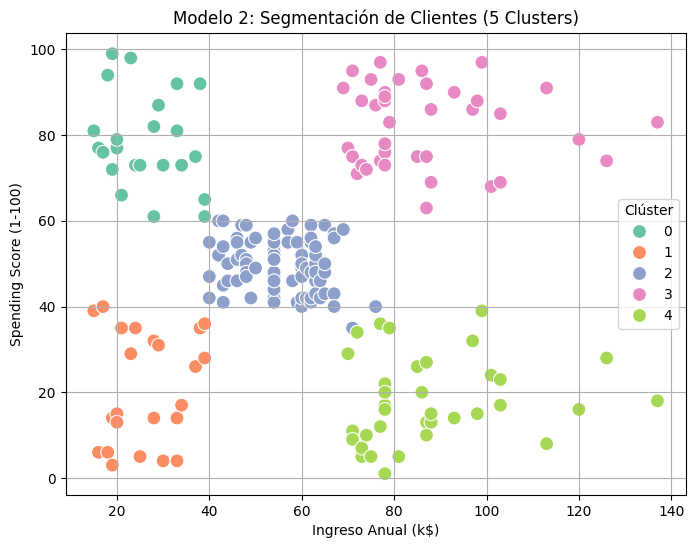

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\786665124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set3')


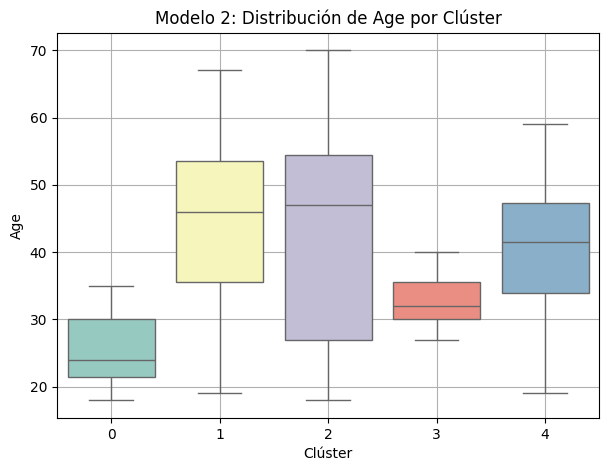

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\786665124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set3')


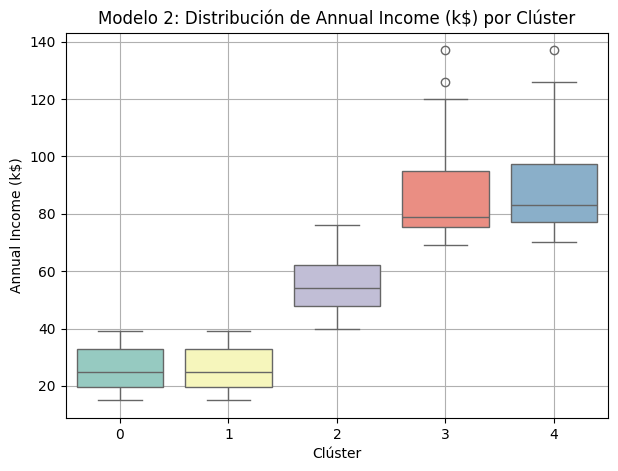

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\786665124.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Set3')


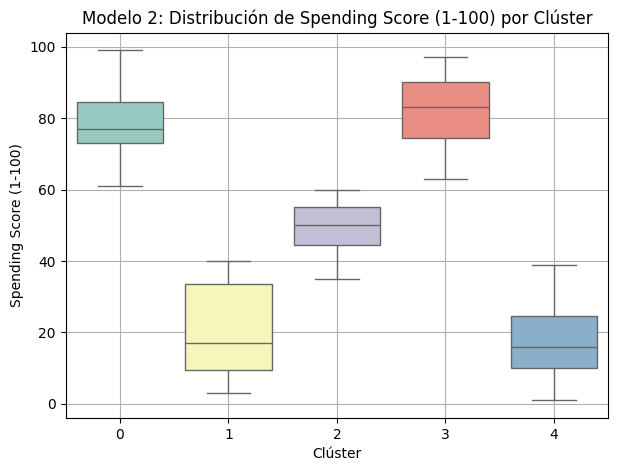

Métricas del Modelo 2:
  - Silhouette: 0.4443
  - Calinski-Harabasz: 151.04
  - Davies-Bouldin: 0.8219


In [10]:
# Paso 6: Entrenar el Modelo 2
from sklearn.cluster import KMeans

# Definir el modelo con los parámetros del Modelo 2
modelo2 = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, random_state=0)

# Entrenar el modelo
modelo2.fit(X)

# Etiquetas de clúster para cada registro
df['Cluster'] = modelo2.labels_

# Paso 2: Visualizar los clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('Modelo 2: Segmentación de Clientes (5 Clusters)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

# Paso 3: Boxplots para cada variable por clúster
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for var in variables:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Cluster', y=var, palette='Set3')
    plt.title(f'Modelo 2: Distribución de {var} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

# Paso 4: Métricas del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = modelo2.labels_

silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print("Métricas del Modelo 2:")
print(f"  - Silhouette: {silhouette:.4f}")
print(f"  - Calinski-Harabasz: {calinski:.2f}")
print(f"  - Davies-Bouldin: {davies:.4f}")


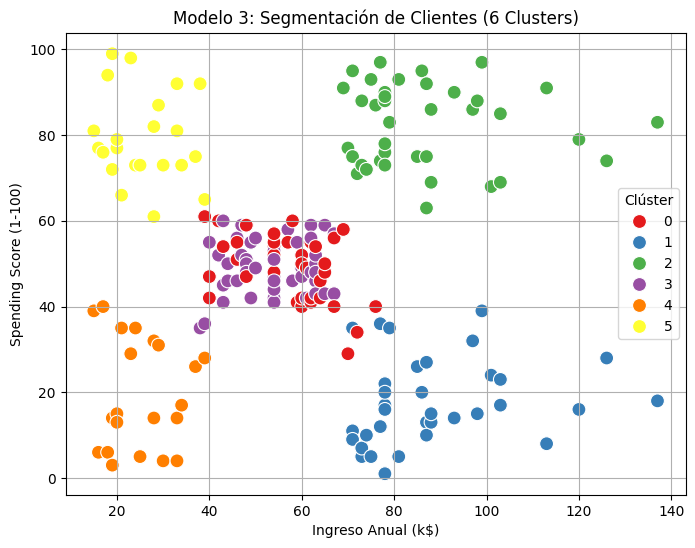

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\3125983289.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Pastel1')


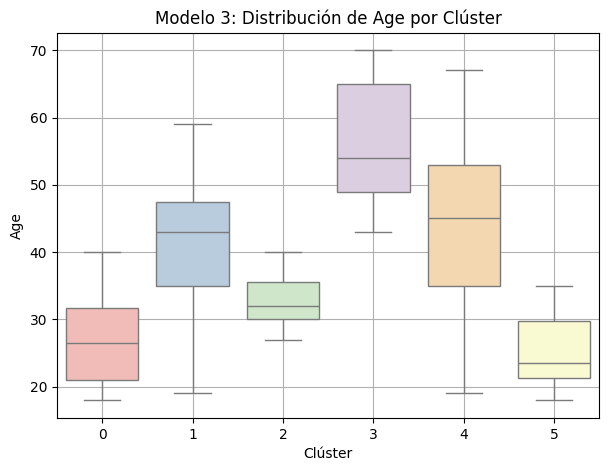

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\3125983289.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Pastel1')


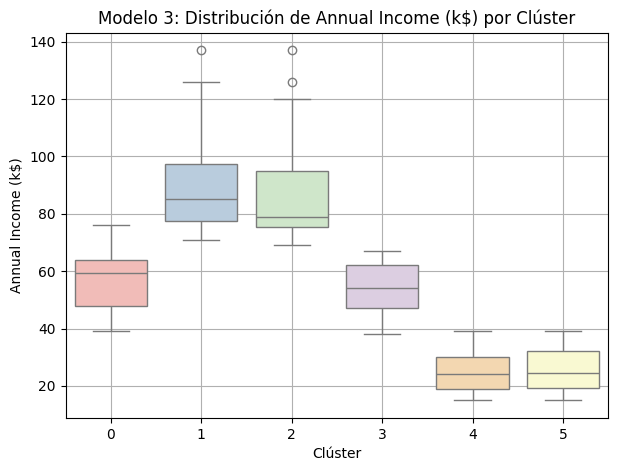

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4820\3125983289.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=var, palette='Pastel1')


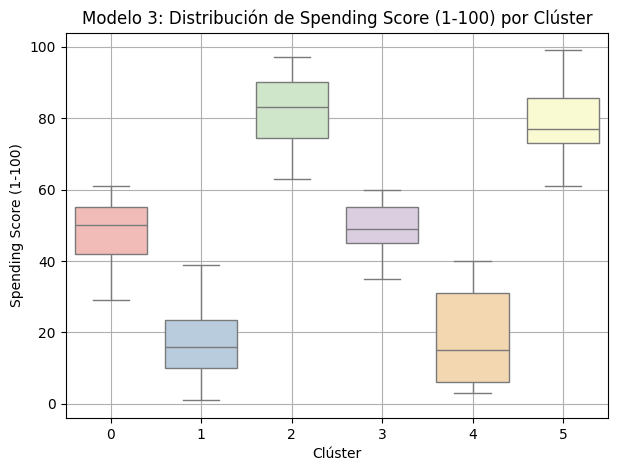

Métricas del Modelo 3:
  - Silhouette: 0.4523
  - Calinski-Harabasz: 166.72
  - Davies-Bouldin: 0.7470


In [11]:
# Paso 6: Entrenar el Modelo 3
from sklearn.cluster import KMeans

# Definir el modelo con los parámetros del Modelo 3
modelo3 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)

# Entrenar el modelo
modelo3.fit(X)

# Etiquetas de clúster para cada registro
df['Cluster'] = modelo3.labels_

# Paso 2: Visualizar los clusters
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Modelo 3: Segmentación de Clientes (6 Clusters)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

# Paso 3: Boxplots para cada variable por clúster
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for var in variables:
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x='Cluster', y=var, palette='Pastel1')
    plt.title(f'Modelo 3: Distribución de {var} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

# Paso 4: Métricas del modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = modelo3.labels_

silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print("Métricas del Modelo 3:")
print(f"  - Silhouette: {silhouette:.4f}")
print(f"  - Calinski-Harabasz: {calinski:.2f}")
print(f"  - Davies-Bouldin: {davies:.4f}")